In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /home/vini/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data = pd.read_csv('imdb-reviews-pt-br.csv')
data.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [4]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49459 entries, 0 to 49458
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         49459 non-null  int64 
 1   text_en    49459 non-null  object
 2   text_pt    49459 non-null  object
 3   sentiment  49459 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [5]:
data.dropna(inplace=True)

In [6]:
stp_words=stopwords.words('portuguese')
def clean_review(review): 
    cleanreview=" ".join(word for word in review.
                        split() if word not in stp_words)
    return cleanreview 

data['text_pt']=data['text_pt'].apply(clean_review)

In [7]:
data.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais vez, Sr. Costner arrumou filme tempo nece...",neg
1,2,This is an example of why the majority of acti...,Este exemplo motivo maioria filmes ação mesmos...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro tudo odeio raps imbecis, poderiam agi...",neg
3,4,Not even the Beatles could write songs everyon...,Nem Beatles puderam escrever músicas todos gos...,neg
4,5,Brass pictures movies is not a fitting word fo...,"Filmes fotos latão palavra apropriada eles, ve...",neg


In [8]:
data['sentiment'].value_counts()

sentiment
neg    24765
pos    24694
Name: count, dtype: int64

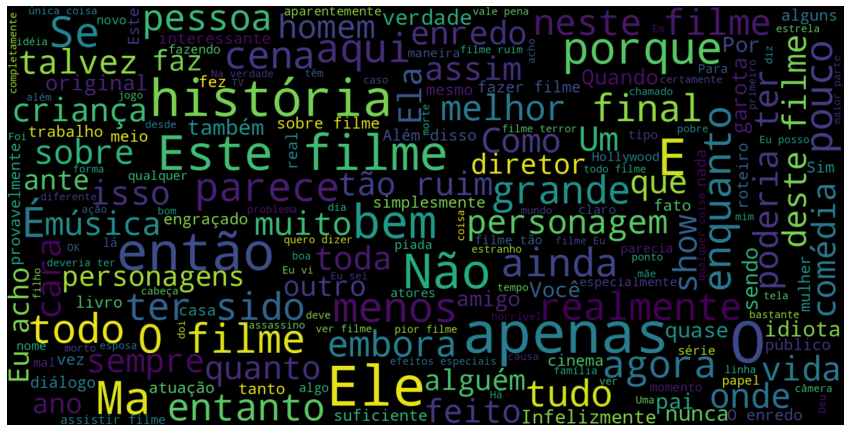

In [9]:
consolidated=' '.join(word for word in data['text_pt'][data['sentiment']=="neg"].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()


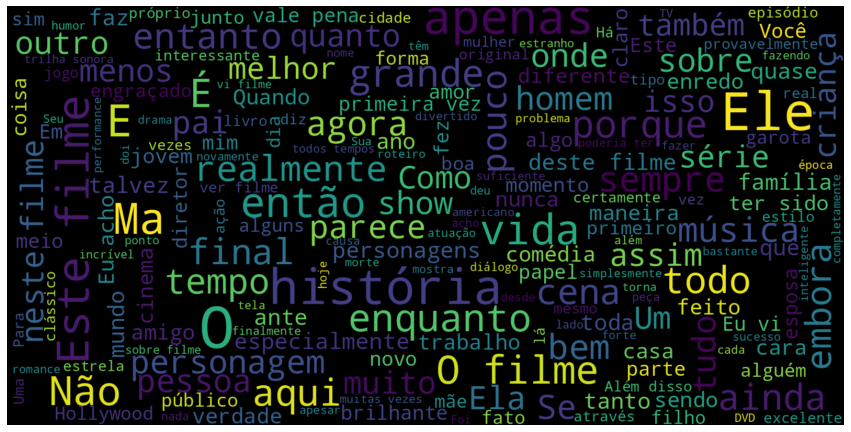

In [10]:
consolidated=' '.join(word for word in data['text_pt'][data['sentiment']=="pos"].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:

cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['text_pt'] ).toarray()

In [12]:

from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,data['sentiment'],
                                                test_size=0.25 ,
                                                random_state=42)

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
 
model=LogisticRegression()
 
#Model fitting
model.fit(x_train,y_train)
 
#testing the model
pred=model.predict(x_test)
 
#model accuracy
print(accuracy_score(y_test,pred))

0.8719773554387383


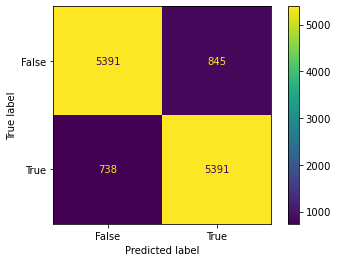

In [14]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = confusion_matrix(y_test,pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
											display_labels = [False, True])
cm_display.plot()
plt.show()
